In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from simdkalman import KalmanFilter

In [2]:
df = pd.read_csv('utils\\poll_data.csv', index_col=0)
df.date = pd.to_datetime(df.date)

In [3]:
n_obs = df.shape[0]

data_remain = df.remain
data_leave = df.leave
data_undecided = df.undecided

In [4]:
# initiating kalman filter
kf = KalmanFilter(
    state_transition = np.array([[1, 1], [0, 1]]),
    process_noise = np.diag([0.1, 0.01]),
    observation_model = np.array([[1, 0]]),
    observation_noise = 1.0
)

In [5]:
result_remain = kf.smooth(data_remain, initial_value=[0.5, 0])
smooth_remain = result_remain.observations.mean

result_leave = kf.smooth(data_leave, initial_value=[0.5, 0])
smooth_leave = result_leave.observations.mean

result_undecided = kf.smooth(data_undecided, initial_value=[0.1, 0])
smooth_undecided = result_undecided.observations.mean

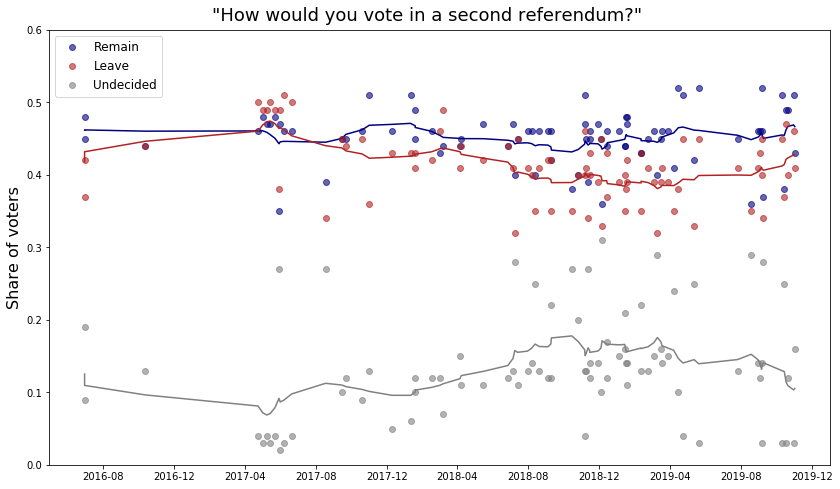

In [29]:

# plotting data
fig, ax = plt.subplots(figsize=(14, 8))
fig.patch.set_facecolor('white')

plt.plot(df.date, data_remain, 'o', color='navy', alpha=0.6, label='Remain')
plt.plot(df.date, smooth_remain, color='navy')

plt.plot(df.date, data_leave, 'o', color='firebrick', alpha=0.6, label='Leave')
plt.plot(df.date, smooth_leave, color='firebrick')

plt.plot(df.date, data_undecided, 'o', color='grey', alpha=0.6, label='Undecided')
plt.plot(df.date, smooth_undecided, color='grey')


plt.ylim((0.0, 0.6))
plt.legend(loc=2, prop={'size': 12})

ax.set_ylabel('Share of voters', size=16)
fig.suptitle('"How would you vote in a second referendum?"', size=18, y=0.92)


plt.show()